In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as tables
import statsmodels.stats.api as sms
import statsmodels.stats as stats

In [2]:
wage_data = pd.read_excel('wage.xlsx', encoding='utf-8')
wage_data.count()

Age              32561
WorkClass        32561
Fnlwgt           32561
Education        32561
EducationYr      32561
Marital          32561
Occupation       32561
Relationship     32561
Race             32561
Sex              32561
CapGain          32561
CapLoss          32561
HoursPWeek       32561
NativeCountry    32561
Salary           32561
dtype: int64

In [3]:
# cleaned_data = wage_data[(wage_data['NativeCountry'].str.strip() != '?') 
#                          & (wage_data['Occupation'].str.strip() != '?')
#                          & (wage_data['WorkClass'].str.strip() != '?')
#                          & (wage_data['Age'] <= 80)]


cleaned_data = wage_data[(wage_data['NativeCountry'].str.strip() != '?') 
                         & (wage_data['Occupation'].str.strip() != '?')
                         & (wage_data['WorkClass'].str.strip() != '?')]


In [ ]:
cleaned_data.EducationYr.dtype

In [ ]:
pd.unique(cleaned_data['CapGain'].sort_values())

In [ ]:
pd.unique(cleaned_data['NativeCountry'].sort_values())

In [ ]:
pd.unique(cleaned_data['Marital'].sort_values())

In [4]:
# Variable: Sex_dummy
# 1: Male
# 0: Female
cleaned_data['Sex_dummy'] = np.where(cleaned_data['Sex'].str.strip() == 'Male', 1, 0)

female_data = cleaned_data[cleaned_data['Sex_dummy'] == 0]
# female_data.count()

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
marital = pd.crosstab(index=female_data["Marital"], columns='count', margins=True)
# marital

In [ ]:
race = pd.crosstab(index=female_data["Race"], columns='count')
# race

In [ ]:
contingency = pd.crosstab(female_data['Marital'], female_data['Race'],margins=True)
# contingency
table = tables.Table(contingency)
table.table_orig

In [ ]:
# Never-married = 0
# Have-married = 1
female_data['Marital_dummy'] = np.where(female_data['Marital'].str.strip() == 'Never-married', 0, 1)

# Married = 1
# Un-married = 0
# female_data['Marital_dummy'] = np.where(female_data['Marital'].str.strip().str.startswith('Married') == True, 1, 0)

In [ ]:
female_data.boxplot(column='Age',by='Marital', fontsize=4.7)

In [ ]:
# White = 1
# Others = 0

female_data['Race_dummy'] = np.where(female_data['Race'].str.strip() == 'White', 1, 0)
# female_data.boxplot(column='Age',by='Race_dummy', fontsize=10)

In [ ]:
# Salary > 50K = 1
# Salary <=50K = 0

female_data['Salary_dummy'] = np.where(female_data['Salary'].str.strip() == '<=50K', 0, 1)
# female_data.boxplot(column='Age',by='Salary', fontsize=10)

In [ ]:
X = female_data[['HoursPWeek','Marital_dummy','Race_dummy','EducationYr','Salary_dummy']]
y = female_data['Age']
X = X.astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
model.predict(np.array([1,168,0,0,19,0]))
# model.predict(np.array([30,0,1,13,0]))

In [ ]:
from statsmodels.formula.api import ols

female_data['HoursPWeek'] = female_data['HoursPWeek'].astype(int)

In [ ]:
formula = 'Age ~ HoursPWeek + C(Marital) + C(Race) + EducationYr + C(Salary_dummy)'
model = ols(formula, female_data).fit()
# stats.anova.anova_single(model, typ=2)
model.summary()


In [ ]:
cleaned_data['HoursPWeek'].hist(bins=20)

In [ ]:
grouped = cleaned_data.groupby(by='Age').mean()
grouped['HoursPWeek'].plot(kind='line', legend='True')

In [ ]:
grouped = cleaned_data.groupby(by='Age').mean()
grouped['CapGain'].plot(kind='line')

In [ ]:
plt.scatter(cleaned_data['Age'],cleaned_data['HoursPWeek'], marker='.', color='blue')
plt.hold
plt.plot(grouped['HoursPWeek'], linewidth=3, color='red',label='line1')
plt.legend(['Mean of HoursPWeek'])
plt.xlim((15,95))
plt.ylim((0,105))
plt.xlabel('Age', fontsize=15)
plt.ylabel('Hours per week(h)', fontsize=15)

In [ ]:
plt.scatter(y, predictions)

In [ ]:
print(X.head())
print(y.head())

### (b)	Interpret the coefficients.


### (c)	What is the predicted age of your instructor? He works 168 hours every week, is not married, has been educated for 19 years, is Asian, and gets paid less than 50K.

### (d)	What is the difference between adding the “sex” variable in (a) as another predictor compared to only looking at a subset of the data (e.g., females in the data set)?

In [4]:
cleaned_data['Race_dummy'] = np.where(cleaned_data['Race'].str.strip() == 'White', 1, 0)
cleaned_data['Salary_dummy'] = np.where(cleaned_data['Salary'].str.strip() == '<=50K', 0, 1)
cleaned_data['Marital_dummy'] = np.where(cleaned_data['Marital'].str.strip() == 'Never-married', 0, 1)
# cleaned_data['Marital_dummy'] = np.where(cleaned_data['Marital'].str.strip().str.startswith('Married') == True, 1, 0)
cleaned_data['Sex_dummy'] = np.where(cleaned_data['Sex'].str.strip() == 'Male', 1, 0)

X = cleaned_data[['HoursPWeek','Marital_dummy','Sex_dummy','Race_dummy','EducationYr','Salary_dummy']]
y = cleaned_data[('Age')]
X = X.astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     1972.
Date:                Thu, 12 Oct 2017   Prob (F-statistic):               0.00
Time:                        02:02:00   Log-Likelihood:            -1.1548e+05
No. Observations:               30162   AIC:                         2.310e+05
Df Residuals:                   30155   BIC:                         2.310e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.7550      0.371     80.111      0.000      29.027      30.483
HoursPWeek       -0.0235      0.006     -4.132      0.000      -0.035      -0.012
Marital_dummy    14.1582      0.148     95.843      0.000      13.869      14.448
Sex_dummy        -0.5563      0.144     -3.851      0.000      -0.839      -0.273
Race_dummy       -0.4215      0.186     -2.263      0.024      -0.787      -0.056
EducationYr       0.0106      0.027      0.394      0.693      -0.042       0.064
Salary_dummy      2.7400      0.170     16.077      0.000       2.406       3.074
==============================================================================
Omnibus:                     3083.496   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4397.680
Skew:                           0.802   Prob(JB):                         0.00
Kurtosis:                       3.964   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (e)	Are there any outliers in data? Use residual plot and tests to identify regression outliers and influential points.

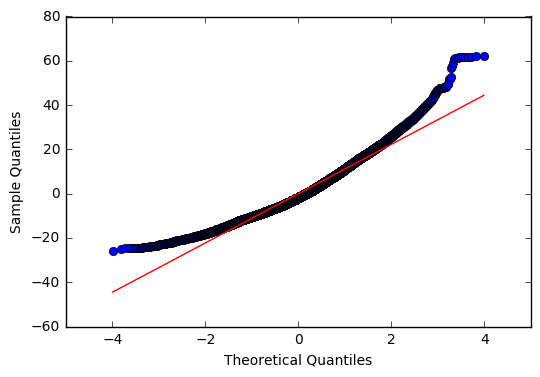

In [6]:
res = model.resid # residuals
fig = sm.qqplot(res,line='s')

In [5]:
influence = model.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

cleaned_data['Cook_D'] = c
cleaned_data['Cook_D_Pval'] = p

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
cleaned_data['Cook_D_over'] = np.where(cleaned_data['Cook_D'] > 4/len(c), 1, 0)

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
cleaned_data['Cook_D_over'].sum()

1540

(0, 30162)

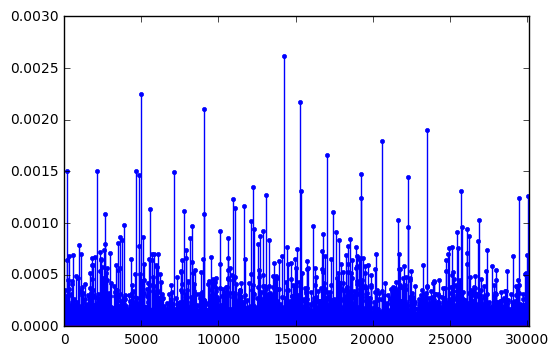

In [13]:
plt.stem(np.arange(len(c)), c, markerfmt=".")
plt.xlim(0,30162)

### (f)	Does the model satisfy the assumptions of regression? Check homoscedasticity, linearity, and normality using plots or tests. Transform the data, as needed, and refit the regression with the necessary modifications. 

In [8]:
trans_data = cleaned_data[cleaned_data['Cook_D_over'] == 0]
trans_data = trans_data[trans_data['Age'] <= 80]

In [9]:
trans_data['Race_dummy'] = np.where(trans_data['Race'].str.strip() == 'White', 1, 0)
trans_data['Salary_dummy'] = np.where(trans_data['Salary'].str.strip() == '<=50K', 0, 1)
trans_data['Marital_dummy'] = np.where(trans_data['Marital'].str.strip() == 'Never-married', 0, 1)
# cleaned_data['Marital_dummy'] = np.where(cleaned_data['Marital'].str.strip().str.startswith('Married') == True, 1, 0)

trans_data['LHoursPWeek'] = np.log(trans_data['HoursPWeek'])
trans_data['LEducationYr'] = np.log(trans_data['EducationYr'])
trans_data['LAge'] = np.log(trans_data['Age'])
X = trans_data[['HoursPWeek','Marital_dummy','Sex_dummy','Race_dummy','EducationYr','Salary_dummy']]
y = trans_data[['LAge']]
X = X.astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LAge   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     3499.
Date:                Thu, 12 Oct 2017   Prob (F-statistic):               0.00
Time:                        02:02:12   Log-Likelihood:                -1159.9
No. Observations:               28622   AIC:                             2334.
Df Residuals:                   28615   BIC:                             2392.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1371      0.009    349.285      0.000       3.120       3.155
HoursPWeek        0.0027      0.000     18.803      0.000       0.002       0.003
Marital_dummy     0.4139      0.003    119.523      0.000       0.407       0.421
Sex_dummy        -0.0214      0.003     -6.319      0.000      -0.028      -0.015
Race_dummy       -0.0299      0.004     -6.775      0.000      -0.039      -0.021
EducationYr       0.0061      0.001      9.430      0.000       0.005       0.007
Salary_dummy      0.0710      0.004     17.876      0.000       0.063       0.079
==============================================================================
Omnibus:                      591.681   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.571
Skew:                           0.081   Prob(JB):                     2.23e-73
Kurtosis:                       2.496   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### normality using plots or tests

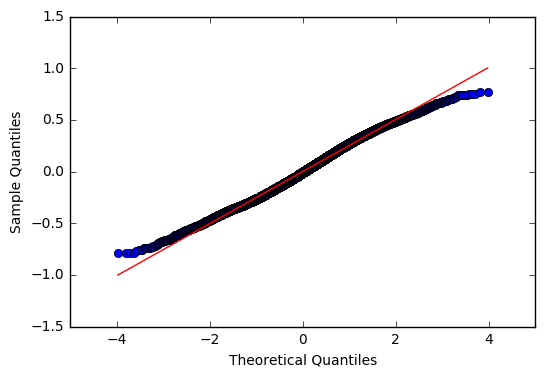

In [104]:
res = model.resid # residuals
fig = sm.qqplot(res, line='s')

#### homoscedasticity

In [92]:
import statsmodels.stats.diagnostic as diagno
im, im_p, f, f_p = diagno.het_breuschpagan(model.resid, y)
f, f_p

(18849.843055709047, 0.0)

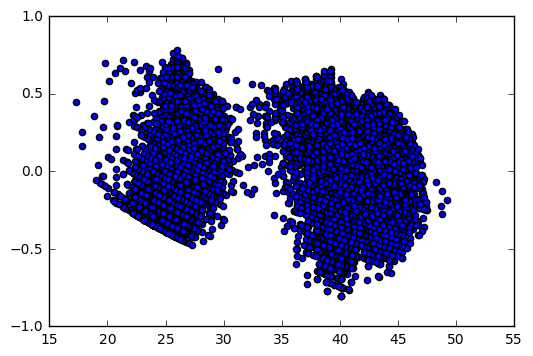

In [93]:
plt.scatter(np.exp(predictions), model.resid)

### (g)	Your instructor is considering whether to add capital gains and losses into the regression model in (e). He believes these two variables will significantly help with all the current variables. Should he or should he not? Assume that the significance level is .05. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F282385438>]], dtype=object)

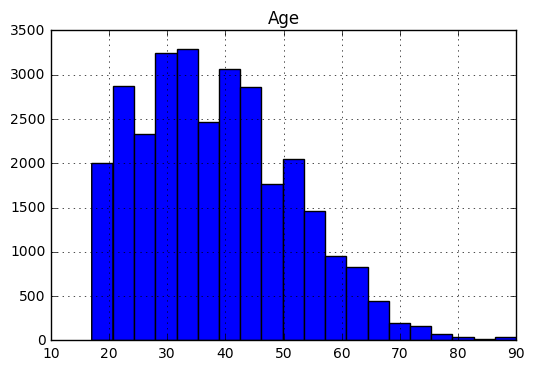

In [100]:
cleaned_data.hist(column='Age', bins=20)

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F2824AEA20>]], dtype=object)

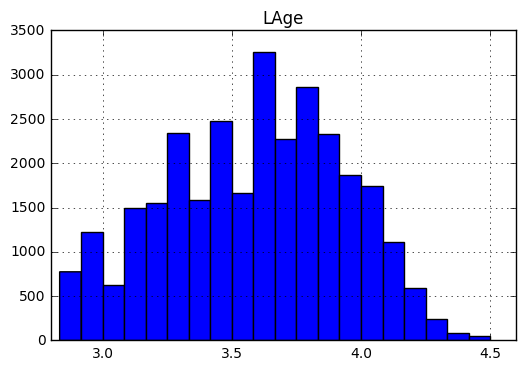

In [102]:
cleaned_data['LAge'] = np.log(cleaned_data['Age'])
cleaned_data.hist(column='LAge', bins=20)

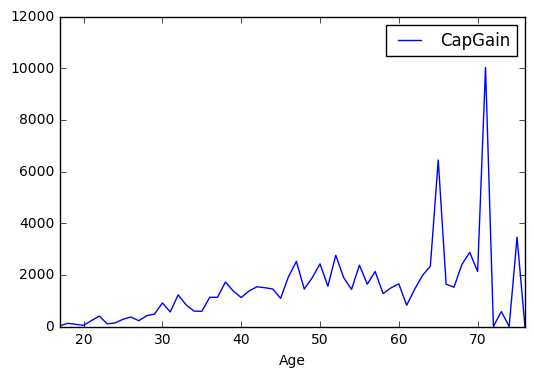

In [105]:
grouped = trans_data.groupby(by='Age').mean()
grouped['CapGain'].plot(kind='line', legend='True')

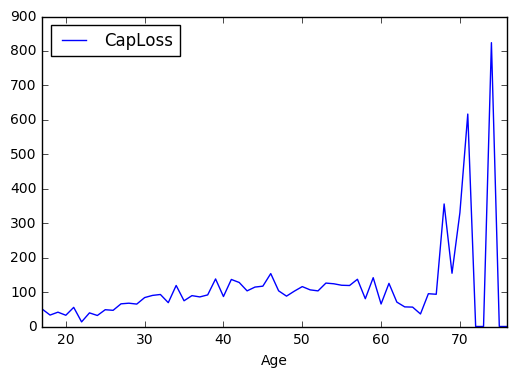

In [106]:
grouped['CapLoss'].plot(kind='line', legend='True')

In [107]:


# X = cleaned_data[['HoursPWeek','Marital_dummy','Sex_dummy','Race_dummy','EducationYr','Salary_dummy','CapGain_dummy','CapLoss_dummy']]
X = trans_data[['HoursPWeek','Marital_dummy','Sex_dummy','Race_dummy','EducationYr','Salary_dummy','CapGain','CapLoss']]

y = trans_data[('LAge')]
X = X.astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LAge   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2628.
Date:                Thu, 12 Oct 2017   Prob (F-statistic):               0.00
Time:                        01:07:43   Log-Likelihood:                -1151.5
No. Observations:               28622   AIC:                             2321.
Df Residuals:                   28613   BIC:                             2395.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1391      0.009    349.085      0.000       3.121       3.157
HoursPWeek        0.0026      0.000     18.655      0.000       0.002       0.003
Marital_dummy     0.4139      0.003    119.531      0.000       0.407       0.421
Sex_dummy        -0.0214      0.003     -6.336      0.000      -0.028      -0.015
Race_dummy       -0.0300      0.004     -6.790      0.000      -0.039      -0.021
EducationYr       0.0060      0.001      9.159      0.000       0.005       0.007
Salary_dummy      0.0675      0.004     16.641      0.000       0.060       0.075
CapGain        7.295e-07   2.07e-07      3.520      0.000    3.23e-07    1.14e-06
CapLoss        8.838e-06   3.77e-06      2.345      0.019    1.45e-06    1.62e-05
==============================================================================
Omnibus:                      589.527   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.542
Skew:                           0.081   Prob(JB):                     3.73e-73
Kurtosis:                       2.497   Cond. No.                     4.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (h)	Your instructor believes that the interaction between race and salary may play a crucial role in explaining the variation in age specified by the model in (e). Test if the interaction term is necessary. Assume that the significance level is .01. 

In [148]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'LAge ~ HoursPWeek + Marital_dummy +Race_dummy + EducationYr + Salary_dummy + Race_dummy*Salary_dummy + Sex_dummy + CapGain + CapLoss'
model = ols(formula, trans_data).fit()
# statsmodels.stats.anova.anova_lm(model)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LAge   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2337.
Date:                Thu, 12 Oct 2017   Prob (F-statistic):               0.00
Time:                        01:20:20   Log-Likelihood:                -1149.2
No. Observations:               28622   AIC:                             2318.
Df Residuals:                   28612   BIC:                             2401.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.1425      0.009    344.122      0.000       3.125       3.160
HoursPWeek                  0.0026      0.000     18.650      0.000       0.002       0.003
Marital_dummy               0.4140      0.003    119.555      0.000       0.407       0.421
Race_dummy                 -0.0342      0.005     -7.075      0.000      -0.044      -0.025
EducationYr                 0.0060      0.001      9.173      0.000       0.005       0.007
Salary_dummy                0.0445      0.011      3.876      0.000       0.022       0.067
Race_dummy:Salary_dummy     0.0253      0.012      2.146      0.032       0.002       0.048
Sex_dummy                  -0.0213      0.003     -6.300      0.000      -0.028      -0.015
CapGain                   7.34e-07   2.07e-07      3.542      0.000    3.28e-07    1.14e-06
CapLoss                  8.816e-06   3.77e-06      2.339      0.019    1.43e-06    1.62e-05
==============================================================================
Omnibus:                      584.759   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.837
Skew:                           0.081   Prob(JB):                     8.76e-73
Kurtosis:                       2.498   Cond. No.                     8.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
import statsmodels.graphics.factorplots as graphs
plt.figure = graphs.interaction_plot(cleaned_data['Race_dummy'], cleaned_data['Salary'], cleaned_data['Age'])
plt.hold
plt.ylim(15,80)
plt.cl

TypeError: 'Figure' object is not callable

### (i)	Check for multicollinearity among the investigated variables.

### (j)	Print the correlation table involving age, education, sex (set the reference), HoursPWeek, and salary. Indicate if the correlation is significant. 

Investigate variance inflation factor. A rule of thumb is that if VIF>10 then multicollinearity is high.

In [29]:
import statsmodels.graphics.api as smg
from statsmodels.stats.outliers_influence import variance_inflation_factor


data2 = trans_data[['LAge','HoursPWeek','Marital_dummy','Sex_dummy','Race_dummy','EducationYr','Salary_dummy']]
data2 = data2.astype(float)
corr_table = data2.corr('pearson')
corr_table

,LAge,HoursPWeek,Marital_dummy,Sex_dummy,Race_dummy,EducationYr,Salary_dummy
LAge,1.000000,0.258557,0.632407,0.115333,0.024829,0.116567,0.315273
HoursPWeek,0.258557,1.000000,0.252845,0.243228,0.061538,0.158561,0.238577
Marital_dummy,0.632407,0.252845,1.000000,0.180980,0.073878,0.045479,0.333374
Sex_dummy,0.115333,0.243228,0.180980,1.000000,0.102836,0.003705,0.221572
Race_dummy,0.024829,0.061538,0.073878,0.102836,1.000000,0.041382,0.085937
EducationYr,0.116567,0.158561,0.045479,0.003705,0.041382,1.000000,0.339021
Salary_dummy,0.315273,0.238577,0.333374,0.221572,0.085937,0.339021,1.000000


In [31]:
vif = pd.DataFrame()
data2 = trans_data[['HoursPWeek','Marital_dummy','Sex_dummy','Race_dummy','EducationYr','Salary_dummy']]

vif["Column"] = data2.columns
vif["VIF Factor"] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]
vif.round(1)

,Column,VIF Factor
0,HoursPWeek,13.1
1,Marital_dummy,3.6
2,Sex_dummy,3.4
3,Race_dummy,6.6
4,EducationYr,11.7
5,Salary_dummy,1.6
